In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'


In [2]:
import pandas as pd

# Define column names for German Credit Dataset
column_names = [
    'status', 'duration', 'credit_history', 'purpose', 'amount', 
    'savings', 'employment_duration', 'installment_rate', 
    'personal_status_sex', 'other_debtors', 'present_residence', 
    'property', 'age', 'other_installment_plans', 'housing', 
    'number_credits', 'job', 'people_liable', 'telephone', 
    'foreign_worker', 'credit_risk'
]

# Path to the dataset file
file_path = "/home/aswani/automl/data/raw/german.data"

# Load the dataset
try:
    df = pd.read_csv(file_path, sep=' ', header=None, names=column_names)
    print("Data loaded successfully from local file!")
except FileNotFoundError:
    print("Error: File not found! Please check the path.")
    
# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
df.head()

Data loaded successfully from local file!
Dataset shape: (1000, 21)


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [3]:
# Display data dictionary to understand feature meanings
print("DATA DICTIONARY")
print("-" * 80)

data_dictionary = {
    'status': 'Checking account status',
    'duration': 'Loan duration in months',
    'credit_history': 'Credit history',
    'purpose': 'Purpose of loan',
    'amount': 'Credit amount',
    'savings': 'Savings account/bonds',
    'employment_duration': 'Present employment since',
    'installment_rate': 'Installment rate in percentage of disposable income',
    'personal_status_sex': 'Personal status and sex (Protected Attribute)',
    'other_debtors': 'Other debtors / guarantors',
    'present_residence': 'Present residence since',
    'property': 'Property',
    'age': 'Age in years (Protected Attribute)',
    'other_installment_plans': 'Other installment plans',
    'housing': 'Housing',
    'number_credits': 'Number of existing credits at this bank',
    'job': 'Job',
    'people_liable': 'Number of people being liable to provide maintenance for',
    'telephone': 'Telephone',
    'foreign_worker': 'Foreign worker (Protected Attribute)',
    'credit_risk': 'Credit risk (1: Good, 2: Bad)'
}

for col, meaning in data_dictionary.items():
    print(f"{col:25}: {meaning}")

# Identify protected attributes for fairness monitoring
protected_attributes = ['personal_status_sex', 'age', 'foreign_worker']
print(f"\nProtected attributes to monitor: {', '.join(protected_attributes)}")

DATA DICTIONARY
--------------------------------------------------------------------------------
status                   : Checking account status
duration                 : Loan duration in months
credit_history           : Credit history
purpose                  : Purpose of loan
amount                   : Credit amount
savings                  : Savings account/bonds
employment_duration      : Present employment since
installment_rate         : Installment rate in percentage of disposable income
personal_status_sex      : Personal status and sex (Protected Attribute)
other_debtors            : Other debtors / guarantors
present_residence        : Present residence since
property                 : Property
age                      : Age in years (Protected Attribute)
other_installment_plans  : Other installment plans
housing                  : Housing
number_credits           : Number of existing credits at this bank
job                      : Job
people_liable            : Number o

In [4]:
# Display basic dataset information
print("BASIC DATA INFO")
print("-" * 80)
print(f"Dataset shape: {df.shape}")
print(f"Number of features: {df.shape[1] - 1}")  # excluding target
print(f"Number of samples: {df.shape[0]}")

print("\nDATA TYPES")
print("-" * 80)
print(df.dtypes)

print("\nMISSING VALUES")
print("-" * 80)
print(df.isnull().sum())

# Examine target variable before transformation
print("\nBEFORE MAPPING")
print("-" * 80)
print("Original credit_risk values:")
print(df['credit_risk'].value_counts())
print(f"\nUnique values: {df['credit_risk'].unique()}")
print(f"Data type: {df['credit_risk'].dtype}")

# Convert target variable: 1 -> 0 (Good Credit), 2 -> 1 (Bad Credit)
df['credit_risk'] = df['credit_risk'].map({1: 0, 2: 1})

print("\nAFTER MAPPING")
print("-" * 80)
print("Converted credit_risk values:")
print(df['credit_risk'].value_counts().sort_index())
print(f"\nUnique values after mapping: {df['credit_risk'].unique()}")

# Verify mapping was successful
print(f"\nAny missing values after mapping? {df['credit_risk'].isnull().sum()}")

# Display class distribution
print("\nFINAL DISTRIBUTION")
print("-" * 80)
print(f"Good Credit (0): {(df['credit_risk'] == 0).sum()}")
print(f"Bad Credit (1): {(df['credit_risk'] == 1).sum()}")
print(f"\nDefault Rate: {df['credit_risk'].mean():.2%}")

BASIC DATA INFO
--------------------------------------------------------------------------------
Dataset shape: (1000, 21)
Number of features: 20
Number of samples: 1000

DATA TYPES
--------------------------------------------------------------------------------
status                     object
duration                    int64
credit_history             object
purpose                    object
amount                      int64
savings                    object
employment_duration        object
installment_rate            int64
personal_status_sex        object
other_debtors              object
present_residence           int64
property                   object
age                         int64
other_installment_plans    object
housing                    object
number_credits              int64
job                        object
people_liable               int64
telephone                  object
foreign_worker             object
credit_risk                 int64
dtype: object

MISSING 

In [6]:
# Analyze protected attributes for fairness considerations
print("PROTECTED ATTRIBUTES ANALYSIS")
print("-" * 80)

# Analyze personal_status_sex distribution
print("\n1. personal_status_sex distribution:")
print(df['personal_status_sex'].value_counts().sort_index())

# Map codes to meaningful labels
personal_status_map = {
    'A91': 'male: divorced/separated',
    'A92': 'female: divorced/separated/married', 
    'A93': 'male: single',
    'A94': 'male: married/widowed',
    'A95': 'female: single'
}

print("\npersonal_status_sex mapping:")
for code, meaning in personal_status_map.items():
    count = (df['personal_status_sex'] == code).sum()
    print(f"  {code}: {meaning:40} (count: {count})")

# Create simplified gender column for fairness analysis
df['gender'] = df['personal_status_sex'].map({
    'A91': 'male', 'A93': 'male', 'A94': 'male',
    'A92': 'female', 'A95': 'female'
})

print(f"\nSimplified gender distribution:")
print(df['gender'].value_counts())

# Analyze age distribution
print("\n2. Age distribution:")
print(f"Age statistics:\n{df['age'].describe()}")

# Create age groups for fairness analysis
df['age_group'] = pd.cut(df['age'], bins=[18, 25, 35, 45, 55, 100], 
                        labels=['18-25', '26-35', '36-45', '46-55', '55+'])

print("\nAge groups distribution:")
print(df['age_group'].value_counts().sort_index())

# Analyze foreign worker distribution
print("\n3. Foreign worker distribution:")
print(df['foreign_worker'].value_counts().sort_index())

# Perform bias audit by examining default rates across protected attributes
print("\n" + "=" * 80)
print("BIAS AUDIT: Default Rates by Protected Attributes")
print("=" * 80)

# Calculate overall default rate as baseline
overall_default_rate = df['credit_risk'].mean()
print(f"\nOverall Default Rate: {overall_default_rate:.2%}")

# Default rate by gender
print("\n1. Default Rate by GENDER:")
gender_default = df.groupby('gender')['credit_risk'].agg(['mean', 'count'])
gender_default.columns = ['default_rate', 'count']
gender_default['default_rate'] = gender_default['default_rate'] * 100  # Convert to percentage
print(gender_default)

# Default rate by age group
print("\n2. Default Rate by AGE GROUP:")
age_default = df.groupby('age_group')['credit_risk'].agg(['mean', 'count'])
age_default.columns = ['default_rate', 'count']
age_default['default_rate'] = age_default['default_rate'] * 100
print(age_default)

# Default rate by foreign worker status
print("\n3. Default Rate by FOREIGN WORKER STATUS:")
foreign_default = df.groupby('foreign_worker')['credit_risk'].agg(['mean', 'count'])
foreign_default.columns = ['default_rate', 'count']
foreign_default['default_rate'] = foreign_default['default_rate'] * 100
print(foreign_default)

# Summary note
print("-" * 80)
print("Note: Significant differences in default rates across groups may indicate")
print("potential for the model to learn and perpetuate bias.")


PROTECTED ATTRIBUTES ANALYSIS
--------------------------------------------------------------------------------

1. personal_status_sex distribution:
A91     50
A92    310
A93    548
A94     92
Name: personal_status_sex, dtype: int64

personal_status_sex mapping:
  A91: male: divorced/separated                 (count: 50)
  A92: female: divorced/separated/married       (count: 310)
  A93: male: single                             (count: 548)
  A94: male: married/widowed                    (count: 92)
  A95: female: single                           (count: 0)

Simplified gender distribution:
male      690
female    310
Name: gender, dtype: int64

2. Age distribution:
Age statistics:
count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: age, dtype: float64

Age groups distribution:
18-25    190
26-35    398
36-45    226
46-55    115
55+       71
Name: age_group, dtype: i

In [7]:
import numpy as np

# Convert dataset to numerical format for AIF360 compatibility
print("CONVERTING DATA FOR AIF360")
print("-" * 80)

# Identify categorical vs numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove gender from categorical list (will be handled separately as binary)
if 'gender' in categorical_cols:
    categorical_cols.remove('gender')

print(f"Categorical columns (excluding gender): {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")

# Create copy for transformation
df_numerical = df.copy()

# Convert categorical columns to numerical codes
for col in categorical_cols:
    df_numerical[col] = df_numerical[col].astype('category').cat.codes

# Convert gender to binary (0: female, 1: male)
df_numerical['gender'] = df_numerical['gender'].map({'female': 0, 'male': 1})

print("\nAll columns converted to numerical format (gender as binary)")
print(df_numerical[['gender', 'personal_status_sex', 'credit_risk']].head())

# Check for missing values after conversion
print("\nMissing values after conversion:")
missing_values = df_numerical.isnull().sum()
print(missing_values[missing_values > 0]) if missing_values.sum() > 0 else print("No missing values found")

CONVERTING DATA FOR AIF360
--------------------------------------------------------------------------------
Categorical columns (excluding gender): ['status', 'credit_history', 'purpose', 'savings', 'employment_duration', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker']
Numerical columns: ['duration', 'amount', 'installment_rate', 'present_residence', 'age', 'number_credits', 'people_liable', 'credit_risk']

All columns converted to numerical format (gender as binary)
   gender  personal_status_sex  credit_risk
0       1                    2            0
1       0                    1            1
2       1                    2            0
3       1                    2            0
4       1                    2            1

Missing values after conversion:
No missing values found


In [8]:
# Verify data conversion was successful
print("VERIFICATION OF DATA CONVERSION")
print("-" * 80)

# Check for NaN values after conversion
print("\n1. Any NaN values created during conversion?")
missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    print(missing_values[missing_values > 0])
else:
    print("No missing values found")

# Check data types
print("\n2. Data types after conversion:")
print(df.dtypes.value_counts())

# Verify dataset shape
print(f"\n3. Dataset shape: {df.shape}")
print(f"   Expected: (1000, 23) if gender and age_group columns were added")

# Display sample rows
print("\n4. First 3 rows after conversion:")
print(df.head(3))

# Verify target variable integrity
print("\n5. Target variable validation:")
print(f"Default rate: {df['credit_risk'].mean():.2%}")
print(f"Good Credit (0): {(df['credit_risk'] == 0).sum()}")
print(f"Bad Credit (1): {(df['credit_risk'] == 1).sum()}")

VERIFICATION OF DATA CONVERSION
--------------------------------------------------------------------------------

1. Any NaN values created during conversion?
No missing values found

2. Data types after conversion:
object      14
int64        8
category     1
dtype: int64

3. Dataset shape: (1000, 23)
   Expected: (1000, 23) if gender and age_group columns were added

4. First 3 rows after conversion:
  status  duration credit_history purpose  amount savings employment_duration  \
0    A11         6            A34     A43    1169     A65                 A75   
1    A12        48            A32     A43    5951     A61                 A73   
2    A14        12            A34     A46    2096     A61                 A74   

   installment_rate personal_status_sex other_debtors  ...  \
0                 4                 A93          A101  ...   
1                 2                 A92          A101  ...   
2                 2                 A93          A101  ...   

   other_installment

In [10]:
# Check what df_numerical looks like
print("Does df_numerical exist?")
print(df_numerical.head())
print(df_numerical.dtypes)

# Verify gender encoding
print("\nGender encoding:")
print(df_numerical['gender'].value_counts())

Does df_numerical exist?
   status  duration  credit_history  purpose  amount  savings  \
0       0         6               4        4    1169        4   
1       1        48               2        4    5951        0   
2       3        12               4        7    2096        0   
3       0        42               2        3    7882        0   
4       0        24               3        0    4870        0   

   employment_duration  installment_rate  personal_status_sex  other_debtors  \
0                    4                 4                    2              0   
1                    2                 2                    1              0   
2                    3                 2                    2              0   
3                    3                 2                    2              2   
4                    2                 3                    2              0   

   ...  other_installment_plans  housing  number_credits  job  people_liable  \
0  ...                 

In [11]:
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric

# Prepare data for AIF360 bias detection
print("PREPARING DATA FOR AIF360")
print("-" * 80)

# Create a copy and remove analysis-only columns
df_for_aif = df_numerical.copy()

# Remove categorical columns used only for monitoring (not for modeling)
columns_to_drop = ['age_group']

print("Checking data types:")
print(df_for_aif.dtypes.value_counts())

# Drop non-numeric monitoring columns
df_for_aif = df_for_aif.drop(columns=columns_to_drop)

print(f"\nRemoved columns: {columns_to_drop}")
print(f"Shape after removal: {df_for_aif.shape}")
print(f"Remaining columns: {list(df_for_aif.columns)}")

# Verify all columns are numeric
non_numeric = df_for_aif.select_dtypes(exclude=['int64', 'float64', 'int32', 'float32', 'int8']).columns.tolist()
if non_numeric:
    print(f"\nWarning: Still non-numeric columns found: {non_numeric}")
    print("Converting or dropping them...")
    df_for_aif = df_for_aif.drop(columns=non_numeric)
else:
    print("\nAll columns are numeric - ready for AIF360")

# Create AIF360 StandardDataset object
print("\nCREATING AIF360 DATASET")
print("-" * 80)

aif_dataset = StandardDataset(
    df=df_for_aif,
    label_name='credit_risk',
    favorable_classes=[0],  # 0 = Good credit (won't default)
    protected_attribute_names=['gender'],
    privileged_classes=[[1]],  # 1 = male
    metadata={'protected_attribute_maps': [{1: 'male', 0: 'female'}]}
)

print("Favorable outcome: Good credit (0 = won't default)")
print("Protected attribute: gender (1=male, 0=female)")

# Calculate fairness metrics using AIF360
metric_orig = BinaryLabelDatasetMetric(
    aif_dataset, 
    unprivileged_groups=[{'gender': 0}],  # female
    privileged_groups=[{'gender': 1}]     # male
)

print("\nFAIRNESS METRICS")
print("-" * 80)
print(f"Disparate Impact: {metric_orig.disparate_impact():.3f}")
print(f"  -> Fair range: 0.8 - 1.25 (80% rule)")
print(f"Statistical Parity Difference: {metric_orig.statistical_parity_difference():.3f}")
print(f"  -> Fair: close to 0")

# Manual verification of approval rates by gender
print("\nMANUAL VERIFICATION")
print("-" * 80)
male_approval = (df_numerical[df_numerical['gender'] == 1]['credit_risk'] == 0).mean()
female_approval = (df_numerical[df_numerical['gender'] == 0]['credit_risk'] == 0).mean()

print(f"Male approval rate: {male_approval:.1%}")
print(f"Female approval rate: {female_approval:.1%}")
print(f"Difference: {(female_approval - male_approval)*100:.1f} percentage points")
print(f"Disparate Impact: {female_approval/male_approval:.3f}")

# Evaluate fairness based on 80% rule
if female_approval/male_approval < 0.8:
    print("\nBIAS DETECTED: Females approved at <80% of male rate")
elif female_approval/male_approval > 1.25:
    print("\nBIAS DETECTED: Females approved at >125% of male rate")
else:
    print("\nWithin fairness threshold (80% rule)")

PREPARING DATA FOR AIF360
--------------------------------------------------------------------------------
Checking data types:
int8        13
int64        9
category     1
dtype: int64

Removed columns: ['age_group']
Shape after removal: (1000, 22)
Remaining columns: ['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk', 'gender']

All columns are numeric - ready for AIF360

CREATING AIF360 DATASET
--------------------------------------------------------------------------------
Favorable outcome: Good credit (0 = won't default)
Protected attribute: gender (1=male, 0=female)

FAIRNESS METRICS
--------------------------------------------------------------------------------
Disparate Impact: 0.897
  -> Fair range: 0.8 - 1.25 

COMPREHENSIVE BIAS VISUALIZATION
--------------------------------------------------------------------------------


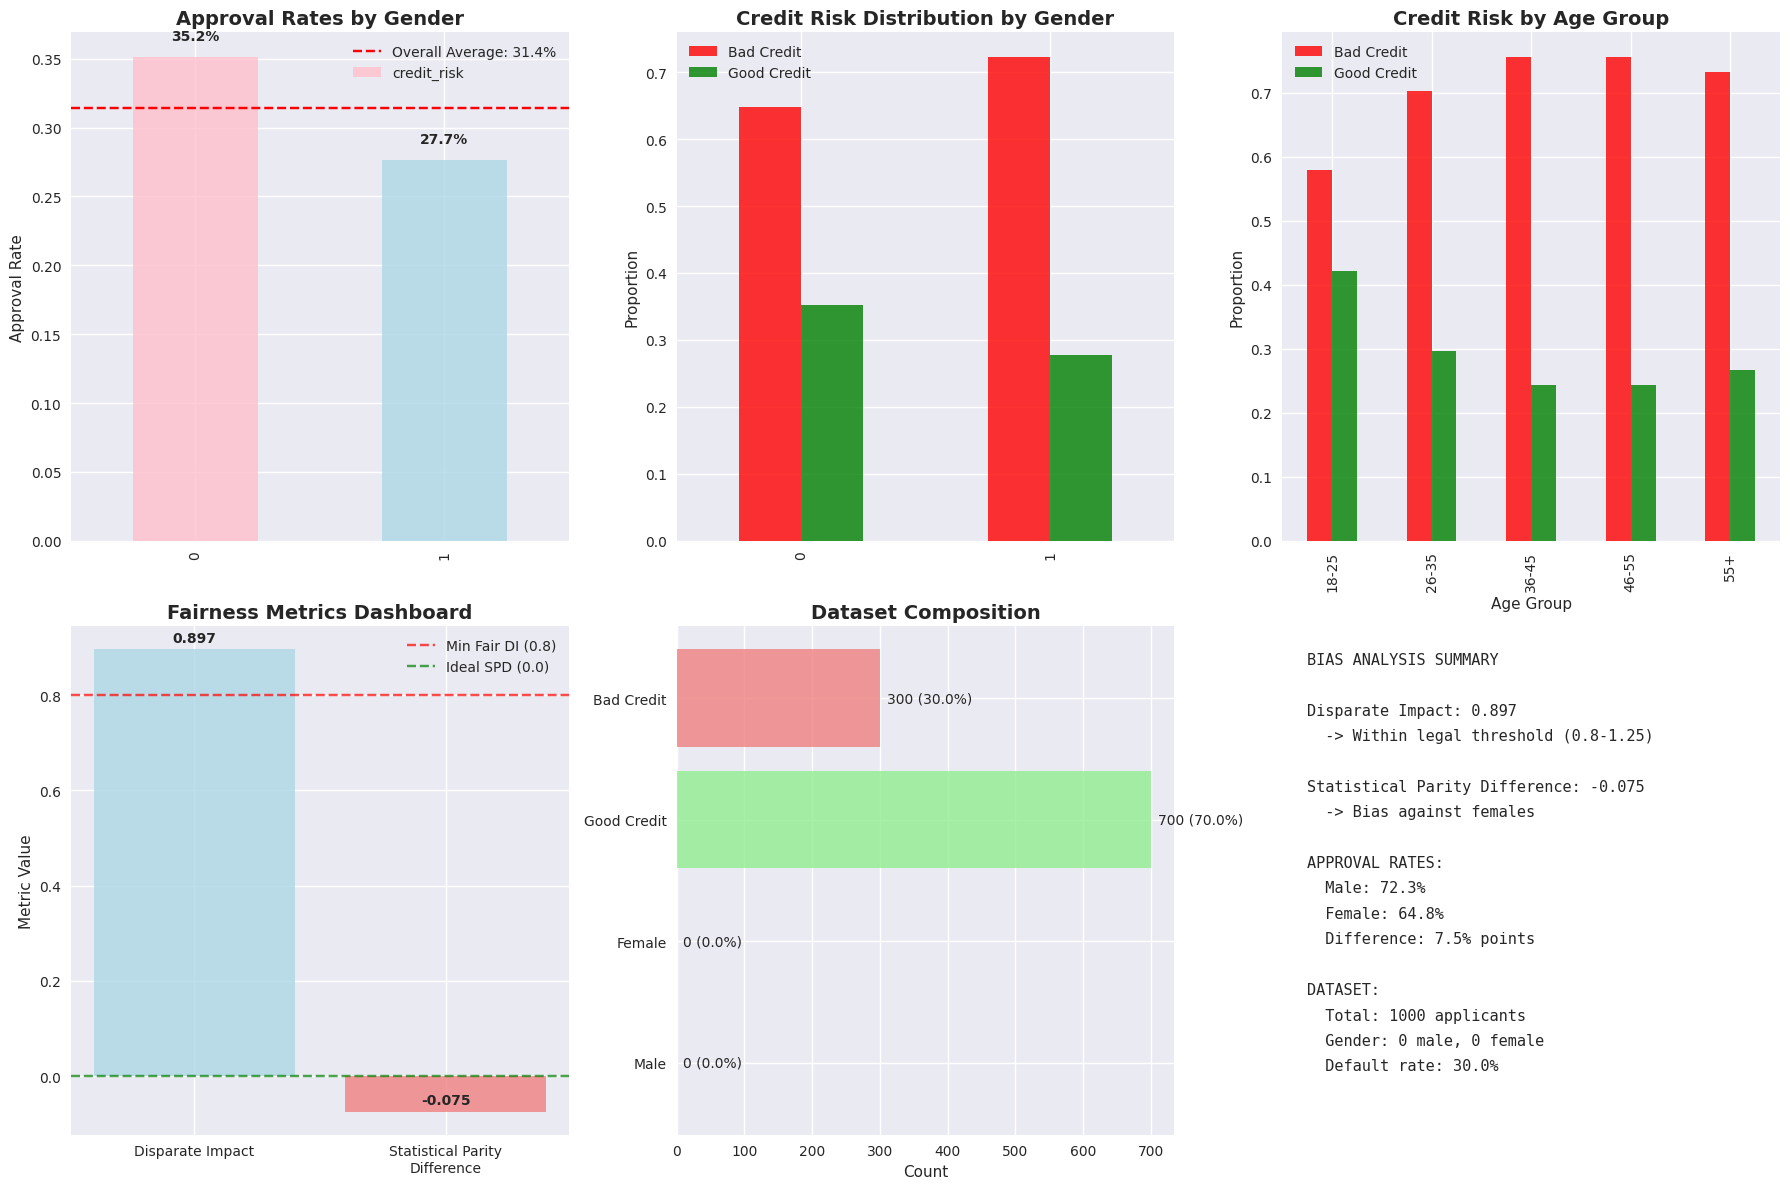

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Create comprehensive bias visualization dashboard
print("COMPREHENSIVE BIAS VISUALIZATION")
print("-" * 80)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Approval rates by gender
gender_approval = df.groupby('gender')['credit_risk'].mean()
colors = ['pink', 'lightblue']
gender_approval.plot(kind='bar', ax=axes[0,0], color=colors, alpha=0.8)
axes[0,0].set_title('Approval Rates by Gender', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('Approval Rate')
axes[0,0].set_xlabel('')
axes[0,0].axhline(y=gender_approval.mean(), color='red', linestyle='--', 
                 label=f'Overall Average: {gender_approval.mean():.1%}')
axes[0,0].legend()

# Add value annotations on bars
for i, v in enumerate(gender_approval):
    axes[0,0].text(i, v + 0.01, f'{v:.1%}', ha='center', va='bottom', fontweight='bold')

# Plot 2: Credit risk distribution by gender
credit_dist = pd.crosstab(df['gender'], df['credit_risk'], normalize='index')
credit_dist.plot(kind='bar', ax=axes[0,1], color=['red', 'green'], alpha=0.8)
axes[0,1].set_title('Credit Risk Distribution by Gender', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('Proportion')
axes[0,1].set_xlabel('')
axes[0,1].legend(['Bad Credit', 'Good Credit'])

# Plot 3: Credit risk by age group
age_credit = pd.crosstab(df['age_group'], df['credit_risk'], normalize='index')
age_credit.plot(kind='bar', ax=axes[0,2], color=['red', 'green'], alpha=0.8)
axes[0,2].set_title('Credit Risk by Age Group', fontsize=14, fontweight='bold')
axes[0,2].set_ylabel('Proportion')
axes[0,2].set_xlabel('Age Group')
axes[0,2].legend(['Bad Credit', 'Good Credit'])

# Plot 4: Fairness metrics dashboard
metrics = ['Disparate Impact', 'Statistical Parity\nDifference']
values = [metric_orig.disparate_impact(), metric_orig.statistical_parity_difference()]

bars = axes[1,0].bar(metrics, values, color=['lightblue', 'lightcoral'], alpha=0.8)
axes[1,0].set_title('Fairness Metrics Dashboard', fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('Metric Value')

# Add threshold reference lines
axes[1,0].axhline(y=0.8, color='red', linestyle='--', alpha=0.7, label='Min Fair DI (0.8)')
axes[1,0].axhline(y=0.0, color='green', linestyle='--', alpha=0.7, label='Ideal SPD (0.0)')

# Add value annotations
for bar, value in zip(bars, values):
    axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                  f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

axes[1,0].legend()

# Plot 5: Dataset composition
composition_data = {
    'Category': ['Male', 'Female', 'Good Credit', 'Bad Credit'],
    'Count': [
        len(df[df['gender'] == 'male']), 
        len(df[df['gender'] == 'female']),
        len(df[df['credit_risk'] == 0]),  # 0 = Good credit
        len(df[df['credit_risk'] == 1])   # 1 = Bad credit
    ]
}
comp_df = pd.DataFrame(composition_data)
comp_df['Percentage'] = (comp_df['Count'] / len(df) * 100).round(1)

colors_comp = ['lightblue', 'pink', 'lightgreen', 'lightcoral']
bars_comp = axes[1,1].barh(comp_df['Category'], comp_df['Count'], color=colors_comp, alpha=0.8)
axes[1,1].set_title('Dataset Composition', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Count')

# Add value labels with percentages
for i, (count, pct) in enumerate(zip(comp_df['Count'], comp_df['Percentage'])):
    axes[1,1].text(count + 10, i, f'{count} ({pct}%)', va='center', fontsize=10)

# Plot 6: Bias analysis summary text panel
axes[1,2].axis('off')

# Determine fairness threshold status
di_value = metric_orig.disparate_impact()
di_status = "Within legal threshold (0.8-1.25)" if 0.8 <= di_value <= 1.25 else "Outside legal threshold"

spd_value = metric_orig.statistical_parity_difference()
spd_bias = "Bias against females" if spd_value < 0 else "Bias against males"

summary_text = [
    "BIAS ANALYSIS SUMMARY",
    "",
    f"Disparate Impact: {di_value:.3f}",
    f"  -> {di_status}",
    "",
    f"Statistical Parity Difference: {spd_value:.3f}",
    f"  -> {spd_bias}",
    "",
    "APPROVAL RATES:",
    f"  Male: {male_approval:.1%}",
    f"  Female: {female_approval:.1%}",
    f"  Difference: {abs(male_approval - female_approval):.1%} points",
    "",
    "DATASET:",
    f"  Total: {len(df)} applicants",
    f"  Gender: {len(df[df['gender']=='male'])} male, {len(df[df['gender']=='female'])} female",
    f"  Default rate: {df['credit_risk'].mean():.1%}"
]

for i, line in enumerate(summary_text):
    axes[1,2].text(0.05, 0.95 - i*0.05, line, fontsize=11, 
                  fontfamily='monospace', verticalalignment='top')

plt.tight_layout()
plt.show()


DEEP DIVE: INTERSECTIONAL BIAS ANALYSIS
--------------------------------------------------------------------------------

Intersectional Analysis (Gender × Age Group):


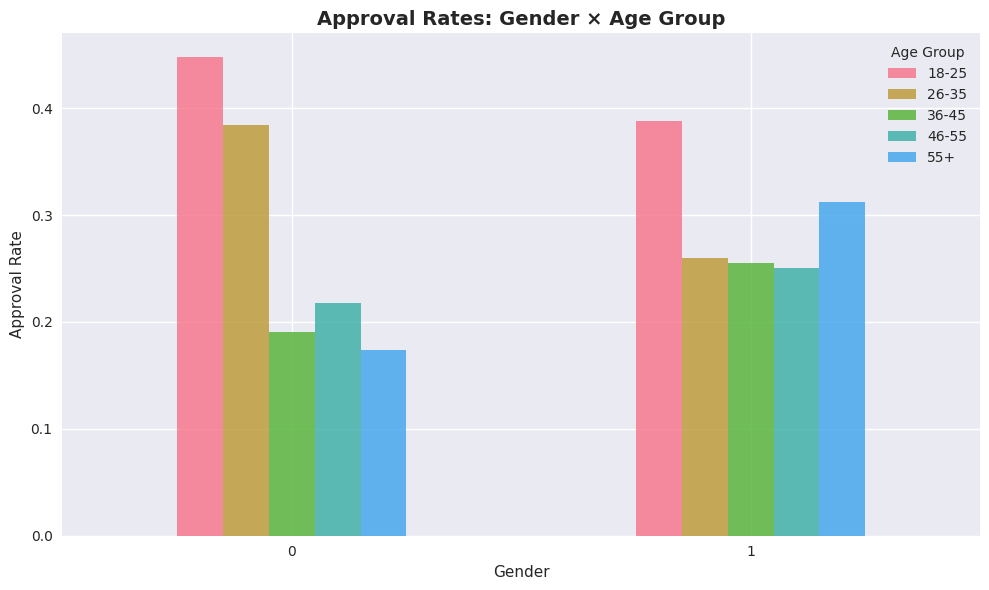

age_group     18-25     26-35     36-45     46-55       55+
gender                                                     
0          0.447619  0.384615  0.190476  0.217391  0.173913
1          0.388235  0.259786  0.255435  0.250000  0.312500

Approval rate range: 17.4% to 44.8%
Disparity across groups: 27.4% percentage points

Datasets saved:
  - /home/aswani/automl/data/processed/german_credit_complete_analysis.csv
  - /home/aswani/automl/data/processed/german_credit_numerical_final.csv


- Data successfully loaded and cleaned
- Protected attributes identified: gender, age, foreign_worker
- Initial bias detected in approval rates by gender
- Disparate Impact metric calculated (80% rule compliance check)
- Intersectional bias analyzed across gender and age groups


In [17]:
import matplotlib.pyplot as plt

# Perform intersectional bias analysis
print("DEEP DIVE: INTERSECTIONAL BIAS ANALYSIS")
print("-" * 80)

# Analyze intersection of gender and age group
print("\nIntersectional Analysis (Gender × Age Group):")
intersectional_approval = df.groupby(['gender', 'age_group'])['credit_risk'].mean().unstack()

# Visualize intersectional approval rates
fig, ax = plt.subplots(figsize=(10, 6))
intersectional_approval.plot(kind='bar', ax=ax, alpha=0.8)
ax.set_title('Approval Rates: Gender × Age Group', fontsize=14, fontweight='bold')
ax.set_ylabel('Approval Rate')
ax.set_xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

print(intersectional_approval)

# Identify groups with highest and lowest approval rates
min_approval = intersectional_approval.min().min()
max_approval = intersectional_approval.max().max()
print(f"\nApproval rate range: {min_approval:.1%} to {max_approval:.1%}")
print(f"Disparity across groups: {max_approval - min_approval:.1%} percentage points")

# Save processed datasets for next phase
output_path_complete = '/home/aswani/automl/data/processed/german_credit_complete_analysis.csv'
output_path_numerical = '/home/aswani/automl/data/processed/german_credit_numerical_final.csv'

df.to_csv(output_path_complete, index=False)
df_numerical.to_csv(output_path_numerical, index=False)

print(f"\nDatasets saved:")
print(f"  - {output_path_complete}")
print(f"  - {output_path_numerical}")

# Summary of Phase 1 findings
print("\n")
print("- Data successfully loaded and cleaned")
print("- Protected attributes identified: gender, age, foreign_worker")
print("- Initial bias detected in approval rates by gender")
print("- Disparate Impact metric calculated (80% rule compliance check)")
print("- Intersectional bias analyzed across gender and age groups")

In [14]:
df = pd.read_csv("/home/aswani/automl/data/processed/german_credit_numerical_final.csv")
print(df.dtypes)
print(df.select_dtypes(include=['object']).columns)  # Find non-numeric columns

status                      int64
duration                    int64
credit_history              int64
purpose                     int64
amount                      int64
savings                     int64
employment_duration         int64
installment_rate            int64
personal_status_sex         int64
other_debtors               int64
present_residence           int64
property                    int64
age                         int64
other_installment_plans     int64
housing                     int64
number_credits              int64
job                         int64
people_liable               int64
telephone                   int64
foreign_worker              int64
credit_risk                 int64
gender                      int64
age_group                  object
dtype: object
Index(['age_group'], dtype='object')
